In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold #Something to split and randomise the data 

from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('Credit/creditdefault_train.csv') #Putting the test data and the train data in data frames 
test = pd.read_csv('Credit/creditdefault_test.csv')

#Seperating the train data labels from the inputs:
y_train = data['Y']
x_train = data.drop(['Y'],axis=1)

#Seperating the test data labels from the inputs:
y_test = test['Y']
x_test = test.drop(['Y'],axis=1)

kf = StratifiedKFold(n_splits=3)
#kf = KFold(15000, n_folds=3)



In [41]:
def graphingMetrics(test,train,x_axis):
    figure,axis = plt.subplot(311)
    
    axis[0].plot(x_axis,train[0],'ro-',x_axis,test[0],'bv--')
    axis[0].set_title('Accuracy')
    
    axis[0].plot(x_axis,train[1],'ro-',x_axis,test[1],'bv--')
    axis[0].set_title('Default precision')
    
    axis[0].plot(x_axis,train[2],'ro-',x_axis,test[2],'bv--')
    axis[0].set_title('payment Precision')

In [18]:
    
def randomForests(est,crit='gini',boot=True,depth=None):   
    train_metrics_mean = np.zeros(3) #Place to store the mean of accuracy, defualt and payment precision 
    

    train_metrics = np.zeros((3,3)) #3x3 matrix to store current train accuracy 
    
    test_metrics = np.zeros(3)  #Place to store test accuracy of that model

    counter = 0
    for train_index, test_index in kf.split(x_train,y_train):# Splitting into three folds 

        #Taking the elements and putting them into array:
        temp_train_x = np.take(x_train,train_index,0)
        temp_train_y = np.take(y_train,train_index,0)

        temp_test_x = np.take(x_train,test_index,0)
        temp_test_y = np.take(y_train,test_index,0)

        #Building model
        random_forest = ensemble.RandomForestClassifier(n_estimators=est,criterion=crit,bootstrap=boot,
                                                        max_depth=depth)
        
        #Fitting model
        random_forest.fit(temp_train_x,temp_train_y)
        #Creating predictions
        pred = random_forest.predict(temp_test_x)
        
        #Storing the metrics of current fold
        train_metrics[counter][0] = accuracy_score(pred,temp_test_y)
        train_metrics[counter][1] = precision_score(pred,temp_test_y)
        train_metrics[counter][2] = precision_score(pred,temp_test_y,pos_label=0)
        
        counter+=1
    
    #Working out the mean of the outputs
    train_metrics_mean = np.mean(train_metrics,axis=0)  ## Working out the mean
    
    #Tesing on the full data set and test set
    main_random = ensemble.RandomForestClassifier(n_estimators=500)
    
    main_random.fit(x_train,y_train)
    
    prediction = main_random.predict(x_test)
    #Storing the metrics on test set
    test_metrics[0] = accuracy_score(prediction,y_test)
    test_metrics[1] = precision_score(prediction,y_test)
    test_metrics[2] = precision_score(prediction,y_test,pos_label=0)
    
    return (train_metrics_mean,test_metrics)
    
    

Whats consuming the most time is the fitting of the data.

In [19]:
train_100 , test_100 = randomForests(100)

TypeError: cannot unpack non-iterable AxesSubplot object

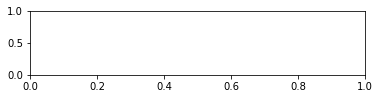

In [43]:
graphingMetrics(train_100,test_100,[100])